In [2]:
from google.colab import files

In [4]:
uploaded = files.upload()

Saving employee_attrition_train.csv to employee_attrition_train.csv


In [5]:
uploaded = files.upload()

Saving employee_attrition_test.csv to employee_attrition_test.csv


In [6]:
import pandas as pd

In [7]:
# Load the training dataset
train_data = pd.read_csv("employee_attrition_train.csv")

In [8]:
test_data = pd.read_csv("employee_attrition_test.csv")

In [9]:
# Show the first few rows of the dataset
train_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,No,Travel_Rarely,1126.0,Research & Development,1.0,2,Medical,1,997,...,3,80,1,32,1,2,5,4,1,3
1,36.0,No,Travel_Rarely,216.0,Research & Development,6.0,2,Medical,1,178,...,4,80,2,7,0,3,3,2,0,1
2,21.0,Yes,Travel_Rarely,337.0,Sales,7.0,1,Marketing,1,1780,...,2,80,0,1,3,3,1,0,1,0
3,50.0,No,Travel_Frequently,1246.0,Human Resources,NaN,3,Medical,1,644,...,3,80,1,32,2,3,32,5,10,7
4,52.0,No,Travel_Rarely,994.0,Research & Development,7.0,4,Life Sciences,1,1118,...,4,80,0,18,4,3,8,6,4,0


In [10]:
# Step 1: Check the shape of the dataset
print("Shape of the dataset: ", train_data.shape)


Shape of the dataset:  (1029, 35)


In [11]:
# Step 2: Understand what each column in the dataset represents
# This has already been done in the Business Understanding phase. The dataset contains various features related to employees, and the target variable is 'Attrition'.

In [12]:
# Step 3: Check the data types of each column
print("\nData types of each column: ")
print(train_data.dtypes)


Data types of each column: 
Age                         float64
Attrition                    object
BusinessTravel               object
DailyRate                   float64
Department                   object
DistanceFromHome            float64
Education                     int64
EducationField               object
EmployeeCount                 int64
EmployeeNumber                int64
EnvironmentSatisfaction       int64
Gender                       object
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                      object
JobSatisfaction               int64
MaritalStatus                object
MonthlyIncome                 int64
MonthlyRate                   int64
NumCompaniesWorked            int64
Over18                       object
OverTime                     object
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StandardHours                 int64

In [13]:
# Step 4: Perform descriptive statistics
print("\nDescriptive Statistics: ")
print(train_data.describe())


Descriptive Statistics: 
              Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  893.000000  1002.000000        934.000000  1029.000000         1029.0   
mean    37.930571   800.528942          9.930407     2.892128            1.0   
std      9.395978   408.109828          8.421791     1.053541            0.0   
min     18.000000   102.000000          1.000000     1.000000            1.0   
25%     31.000000   458.250000          2.000000     2.000000            1.0   
50%     37.000000   801.500000          8.000000     3.000000            1.0   
75%     44.000000  1162.000000         16.000000     4.000000            1.0   
max     60.000000  1496.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1029.000000              1029.000000  1029.000000     1029.000000   
mean      1024.367347                 2.683188    66.680272        2.713314   
std        606.3

In [14]:
# Step 5: Check for missing values
print("Missing values in each column: ")
print(train_data.isnull().sum())

Missing values in each column: 
Age                         136
Attrition                     0
BusinessTravel                5
DailyRate                    27
Department                    0
DistanceFromHome             95
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 5
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLife

In [15]:
# Step 6: Check for duplicate values
print("\nNumber of duplicate rows: ", train_data.duplicated().sum())


Number of duplicate rows:  0


In [16]:
# Step 7: Explore the target variable 'Attrition'
print("\nDistribution of the target variable 'Attrition': ")
print(train_data['Attrition'].value_counts())


Distribution of the target variable 'Attrition': 
No     853
Yes    176
Name: Attrition, dtype: int64


In [17]:
# Step 8: Perform some exploratory data analysis
# For this step, let's look at the correlation matrix to see how the different features are related to each other.
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
# Convert 'Attrition' to numerical values
train_data_num = train_data.replace({'Attrition': {'Yes': 1, 'No': 0}})

In [19]:
# Compute the correlation matrix
corr = train_data_num.corr()

<ipython-input-19-5522707f47c3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train_data_num.corr()


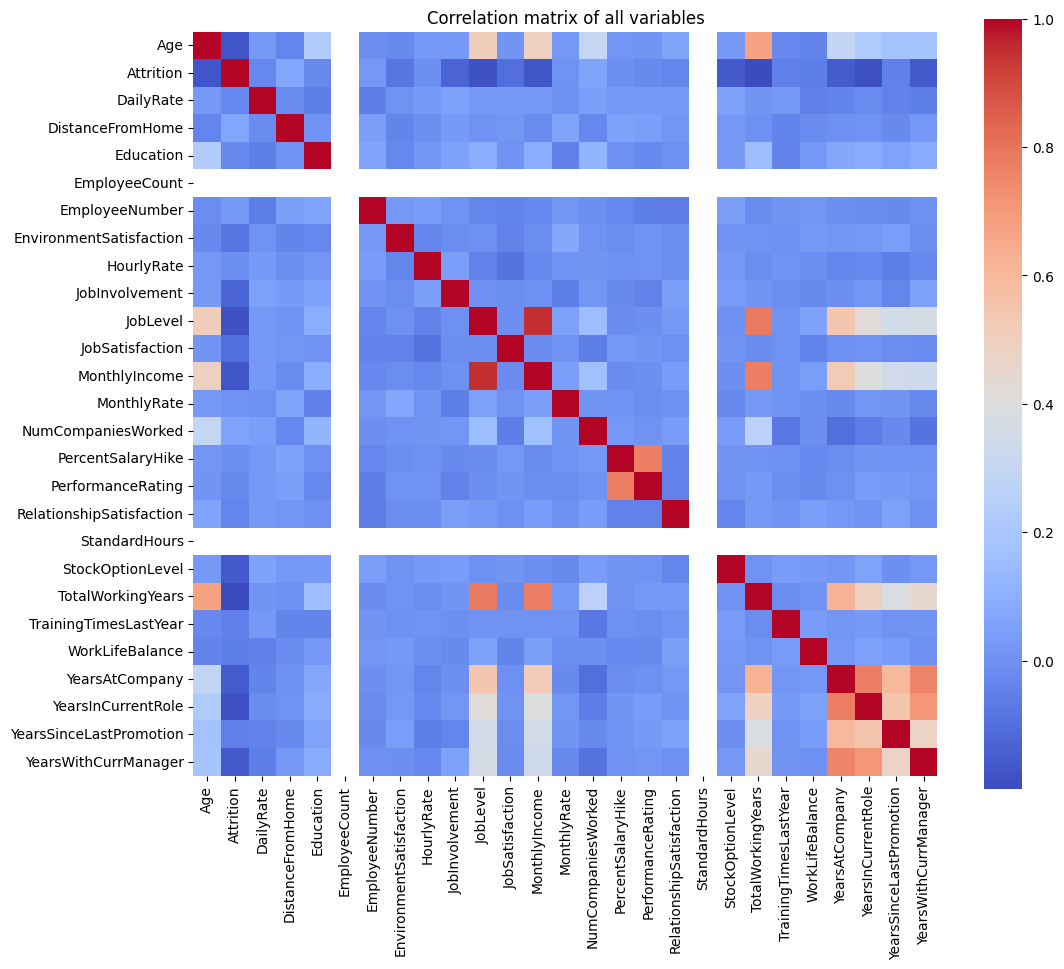

In [20]:
# Draw the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', square=True)
plt.title('Correlation matrix of all variables')
plt.show()

In [21]:
# Step 1: Handle Missing Values
# Median imputation for numerical columns
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['DailyRate'].fillna(train_data['DailyRate'].median(), inplace=True)
train_data['DistanceFromHome'].fillna(train_data['DistanceFromHome'].median(), inplace=True)

In [22]:
# Mode imputation for categorical columns
train_data['BusinessTravel'].fillna(train_data['BusinessTravel'].mode()[0], inplace=True)
train_data['MaritalStatus'].fillna(train_data['MaritalStatus'].mode()[0], inplace=True)

In [23]:
# Check if there are still any missing values
print("Missing values in each column: ")
print(train_data.isnull().sum())

Missing values in each column: 
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInC

In [24]:
# Step 2: Encode Categorical Variables

In [25]:
# Select the categorical columns
categorical_cols = train_data.select_dtypes(include=['object']).columns

In [26]:
# Perform one-hot encoding
train_data_encoded = pd.get_dummies(train_data, columns=categorical_cols)

In [27]:
# Show the first few rows of the encoded dataset
train_data_encoded.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,50.0,1126.0,1.0,2,1,997,4,66,3,4,...,1,0,0,0,1,0,0,1,1,0
1,36.0,216.0,6.0,2,1,178,2,84,3,2,...,0,0,0,0,1,0,0,1,1,0
2,21.0,337.0,7.0,1,1,1780,2,31,3,1,...,0,0,0,1,0,0,1,1,1,0
3,50.0,1246.0,8.0,3,1,644,1,99,3,5,...,0,0,0,0,0,1,0,1,1,0
4,52.0,994.0,7.0,4,1,1118,2,87,3,3,...,0,0,0,0,0,0,1,1,1,0


In [28]:
# Step 3: Normalize Numerical Variables

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
# Select the numerical columns
numerical_cols = train_data_encoded.select_dtypes(include=['int64', 'float64']).columns

In [31]:
# Initialize a scaler
scaler = MinMaxScaler()

In [33]:
# Apply the scaler to the numerical columns
train_data_encoded[numerical_cols] = scaler.fit_transform(train_data_encoded[numerical_cols])

In [34]:
# Show the first few rows of the normalized dataset
train_data_encoded.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0.761905,0.734577,0.000000,0.25,0.0,0.481858,1.000000,0.514286,0.666667,0.75,...,1,0,0,0,1,0,0,1,1,0
1,0.428571,0.081779,0.178571,0.25,0.0,0.085631,0.333333,0.771429,0.666667,0.25,...,0,0,0,0,1,0,0,1,1,0
2,0.071429,0.168580,0.214286,0.00,0.0,0.860668,0.333333,0.014286,0.666667,0.00,...,0,0,0,1,0,0,1,1,1,0
3,0.761905,0.820660,0.250000,0.50,0.0,0.311079,0.000000,0.985714,0.666667,1.00,...,0,0,0,0,0,1,0,1,1,0
4,0.809524,0.639885,0.214286,0.75,0.0,0.540397,0.333333,0.814286,0.666667,0.50,...,0,0,0,0,0,0,1,1,1,0


In [35]:
from sklearn.model_selection import train_test_split

In [36]:
# Separate the features (X) and the target variable (y)
X = train_data_encoded.drop(columns=['Attrition_Yes', 'Attrition_No'])
y = train_data_encoded['Attrition_Yes']

In [37]:
# Split the data into a training set and a validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Check the shapes of the training and validation sets
print("Training set shape (features): ", X_train.shape)
print("Training set shape (target): ", y_train.shape)
print("Validation set shape (features): ", X_val.shape)
print("Validation set shape (target): ", y_val.shape)

Training set shape (features):  (823, 55)
Training set shape (target):  (823,)
Validation set shape (features):  (206, 55)
Validation set shape (target):  (206,)


In [39]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [40]:
# Step 1: Initialize a Logistic Regression model
logreg = LogisticRegression(random_state=42)

In [41]:
# Step 2: Train the model on the training data
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [42]:
# Step 3: Evaluate the model's performance on the validation data
y_val_pred = logreg.predict_proba(X_val)[:, 1]
auc_score_logreg = roc_auc_score(y_val, y_val_pred)
auc_score_logreg

0.8634920634920635

In [43]:
from sklearn.model_selection import GridSearchCV

In [45]:
# Define the hyperparameter grid
param_grid_logreg = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}


In [46]:
# Initialize a GridSearchCV object that will perform the grid search
grid_search_logreg = GridSearchCV(logreg, param_grid_logreg, cv=5, scoring='roc_auc', n_jobs=-1)

In [47]:
# Perform the grid search (this will take some time)
grid_search_logreg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='roc_auc')

In [48]:
# Get the best parameters and the best score
best_params_logreg = grid_search_logreg.best_params_
best_score_logreg = grid_search_logreg.best_score_

In [49]:
best_params_logreg, best_score_logreg

({'C': 1}, 0.8313433295543238)

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
# Step 1: Initialize a Random Forest model
rf = RandomForestClassifier(random_state=42)

In [52]:
# Step 2: Train the model on the training data
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [53]:
# Step 3: Evaluate the model's performance on the validation data
y_val_pred = rf.predict_proba(X_val)[:, 1]
auc_score_rf = roc_auc_score(y_val, y_val_pred)

In [54]:
auc_score_rf

0.8359231411862991

In [55]:
# Define the hyperparameter grid
param_grid_rf = {
'n_estimators': [100, 200, 300],
'max_depth': [None, 5, 10],
'min_samples_split': [2, 5],
'min_samples_leaf': [1, 3]
}

In [56]:
# Initialize a GridSearchCV object that will perform the grid search
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='roc_auc', n_jobs=-1)

In [57]:
# Perform the grid search (this will take some time)
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10], 'min_samples_leaf': [1, 3],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc')

In [58]:
# Get the best parameters and the best score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

In [59]:
best_params_rf, best_score_rf

({'max_depth': 10,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 300},
 0.7973159821441792)

In [60]:
from sklearn.metrics import confusion_matrix, classification_report

In [61]:
# Use the best Logistic Regression model to make predictions on the validation set
y_val_pred = grid_search_logreg.predict(X_val)

In [62]:
# Compute the confusion matrix
cm = confusion_matrix(y_val, y_val_pred)
# Compute precision, recall, F1-score, and support
cr = classification_report(y_val, y_val_pred)

In [63]:
cm, cr

(array([[164,   7],
        [ 22,  13]]),
 '              precision    recall  f1-score   support\n\n           0       0.88      0.96      0.92       171\n           1       0.65      0.37      0.47        35\n\n    accuracy                           0.86       206\n   macro avg       0.77      0.67      0.70       206\nweighted avg       0.84      0.86      0.84       206\n')

In [64]:
import pickle

In [66]:
# Save the best model to a file
with open('logreg_model.pkl', 'wb') as file:
 pickle.dump(grid_search_logreg.best_estimator_, file)

In [67]:
import zipfile
import os

In [71]:
train_data = pd.read_csv('employee_attrition_train.csv')
test_data = pd.read_csv('employee_attrition_test.csv')

In [72]:
# Displaying the first few rows of the training data
train_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,No,Travel_Rarely,1126.0,Research & Development,1.0,2,Medical,1,997,...,3,80,1,32,1,2,5,4,1,3
1,36.0,No,Travel_Rarely,216.0,Research & Development,6.0,2,Medical,1,178,...,4,80,2,7,0,3,3,2,0,1
2,21.0,Yes,Travel_Rarely,337.0,Sales,7.0,1,Marketing,1,1780,...,2,80,0,1,3,3,1,0,1,0
3,50.0,No,Travel_Frequently,1246.0,Human Resources,NaN,3,Medical,1,644,...,3,80,1,32,2,3,32,5,10,7
4,52.0,No,Travel_Rarely,994.0,Research & Development,7.0,4,Life Sciences,1,1118,...,4,80,0,18,4,3,8,6,4,0


In [73]:
# Checking for missing values in the training data
missing_values_train = train_data.isnull().sum()

In [74]:
# Checking the data types of the features
data_types_train = train_data.dtypes

In [75]:
# Checking the distribution of the target variable
target_distribution_train = train_data['Attrition'].value_counts()

In [76]:
missing_values_train, data_types_train, target_distribution_train

(Age                         136
 Attrition                     0
 BusinessTravel                5
 DailyRate                    27
 Department                    0
 DistanceFromHome             95
 Education                     0
 EducationField                0
 EmployeeCount                 0
 EmployeeNumber                0
 EnvironmentSatisfaction       0
 Gender                        0
 HourlyRate                    0
 JobInvolvement                0
 JobLevel                      0
 JobRole                       0
 JobSatisfaction               0
 MaritalStatus                 5
 MonthlyIncome                 0
 MonthlyRate                   0
 NumCompaniesWorked            0
 Over18                        0
 OverTime                      0
 PercentSalaryHike             0
 PerformanceRating             0
 RelationshipSatisfaction      0
 StandardHours                 0
 StockOptionLevel              0
 TotalWorkingYears             0
 TrainingTimesLastYear         0
 WorkLifeB

In [77]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer

In [78]:
# Filling missing values
imputer_freq = SimpleImputer(strategy='most_frequent')
imputer_median = SimpleImputer(strategy='median')

In [79]:
for column in ['BusinessTravel', 'MaritalStatus']:
 train_data[column] = imputer_freq.fit_transform(train_data[[column]])

In [80]:
for column in ['Age', 'DailyRate', 'DistanceFromHome']:
 train_data[column] = imputer_median.fit_transform(train_data[[column]])

In [81]:
# Checking if all missing values have been filled
missing_values_filled = train_data.isnull().sum()
missing_values_filled.sum()

0

In [82]:
# Filling missing values in test data
for column in ['BusinessTravel', 'MaritalStatus']:
 test_data[column] = imputer_freq.transform(test_data[[column]])

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- BusinessTravel
Feature names seen at fit time, yet now missing:
- MaritalStatus


In [83]:
for column in ['Age', 'DailyRate', 'DistanceFromHome']:
 test_data[column] = imputer_median.transform(test_data[[column]])

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Age
Feature names seen at fit time, yet now missing:
- DistanceFromHome


In [84]:
# Initializing the Label Encoder
encoder = LabelEncoder()

In [85]:
# Encoding categorical variables
for column in train_data.columns:
 if train_data[column].dtype == 'object':
  train_data[column] = encoder.fit_transform(train_data[column])
  if column in test_data.columns:
    test_data[column] = encoder.transform(test_data[column])

ValueError: y contains previously unseen labels: nan

In [86]:
# Displaying the first few rows of the preprocessed training data
34
train_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,0,2,1126.0,Research & Development,1.0,2,Medical,1,997,...,3,80,1,32,1,2,5,4,1,3
1,36.0,0,2,216.0,Research & Development,6.0,2,Medical,1,178,...,4,80,2,7,0,3,3,2,0,1
2,21.0,1,2,337.0,Sales,7.0,1,Marketing,1,1780,...,2,80,0,1,3,3,1,0,1,0
3,50.0,0,1,1246.0,Human Resources,8.0,3,Medical,1,644,...,3,80,1,32,2,3,32,5,10,7
4,52.0,0,2,994.0,Research & Development,7.0,4,Life Sciences,1,1118,...,4,80,0,18,4,3,8,6,4,0


In [87]:
# Loading the data again
train_data = pd.read_csv('employee_attrition_train.csv')
test_data = pd.read_csv('employee_attrition_test.csv')

In [88]:
# Filling missing values
for column in ['BusinessTravel', 'MaritalStatus']:
 train_data[column] = imputer_freq.fit_transform(train_data[[column]])
 test_data[column] = imputer_freq.transform(test_data[[column]])

In [89]:
for column in ['Age', 'DailyRate', 'DistanceFromHome']:
 train_data[column] = imputer_median.fit_transform(train_data[[column]])
 test_data[column] = imputer_median.transform(test_data[[column]])

In [94]:
# Encoding categorical variables with combined unique values from training and test data
for column in train_data.columns:
  if train_data[column].dtype == 'object':
    combined_unique_values = pd.concat([train_data[column],
test_data[column]]).dropna().unique()
    encoder.fit(combined_unique_values)
    train_data[column] = encoder.transform(train_data[column])
    if column in test_data.columns:
      test_data[column] = encoder.transform(test_data[column])

KeyError: 'Attrition'

In [95]:
# Displaying the first few rows of the preprocessed training data
train_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,No,Travel_Rarely,1126.0,Research & Development,1.0,2,Medical,1,997,...,3,80,1,32,1,2,5,4,1,3
1,36.0,No,Travel_Rarely,216.0,Research & Development,6.0,2,Medical,1,178,...,4,80,2,7,0,3,3,2,0,1
2,21.0,Yes,Travel_Rarely,337.0,Sales,7.0,1,Marketing,1,1780,...,2,80,0,1,3,3,1,0,1,0
3,50.0,No,Travel_Frequently,1246.0,Human Resources,8.0,3,Medical,1,644,...,3,80,1,32,2,3,32,5,10,7
4,52.0,No,Travel_Rarely,994.0,Research & Development,7.0,4,Life Sciences,1,1118,...,4,80,0,18,4,3,8,6,4,0


In [96]:
# Loading the data again
train_data = pd.read_csv('employee_attrition_train.csv')
test_data = pd.read_csv('employee_attrition_test.csv')

In [97]:
# Filling missing values
for column in ['BusinessTravel', 'MaritalStatus']:
 train_data[column] = imputer_freq.fit_transform(train_data[[column]])
 test_data[column] = imputer_freq.transform(test_data[[column]])

In [98]:
for column in ['Age', 'DailyRate', 'DistanceFromHome']:
 train_data[column] = imputer_median.fit_transform(train_data[[column]])
 test_data[column] = imputer_median.transform(test_data[[column]])

In [127]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


In [129]:
# Initialize the encoder  # Encoding categorical variables with combined unique values from training and test data
encoder = LabelEncoder()

# Assuming `train_data` and `test_data` are your Pandas DataFrame
for column in train_data.columns:
    if train_data[column].dtype == 'object':  # Checking for categorical data
        if column in test_data.columns:
            # Combining unique values from both training and test data
            combined = pd.concat([train_data[column], test_data[column]]).dropna().unique()
        else:
            # If the column is not in test data, take the unique values from train data only
            combined = train_data[column].dropna().unique()

        # Fitting the encoder on the combined data
        encoder.fit(combined)

        # Transforming the training data
        train_data[column] = encoder.transform(train_data[column].astype(str))

        # Transforming the test data, if the column exists in the test data
        if column in test_data.columns:
            test_data[column] = encoder.transform(test_data[column].astype(str))


In [130]:
# Displaying the first few rows of the preprocessed training data
train_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,28,0,2,495,1,1.0,2,3,1,997,...,3,80,1,32,1,2,5,4,1,3
1,14,0,2,64,1,6.0,2,3,1,178,...,4,80,2,7,0,3,3,2,0,1
2,3,1,2,122,2,7.0,1,2,1,1780,...,2,80,0,1,3,3,1,0,1,0
3,28,0,1,558,0,8.0,3,3,1,644,...,3,80,1,32,2,3,32,5,10,7
4,30,0,2,439,1,7.0,4,1,1,1118,...,4,80,0,18,4,3,8,6,4,0


In [131]:
# Separating the features and the target
X_train = train_data.drop('Attrition', axis=1)
y_train = train_data['Attrition']

In [132]:
# Verifying the shapes
X_train.shape, y_train.shape

((1029, 34), (1029,))

In [133]:
# Training a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [134]:
# Getting feature importances
feature_importances = rf_model.feature_importances_

In [135]:
# Creating a DataFrame for easier visualization
feature_importances_df = pd.DataFrame({
'Feature': X_train.columns,
'Importance': feature_importances
})

In [136]:
# Sorting the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)

In [137]:
# Displaying the feature importances
feature_importances_df

,Feature,Importance
17,MonthlyIncome,0.080771
0,Age,0.055135
21,OverTime,0.054578
27,TotalWorkingYears,0.054229
2,DailyRate,0.052595
8,EmployeeNumber,0.049943
18,MonthlyRate,0.044833
30,YearsAtCompany,0.044073
4,DistanceFromHome,0.043065
11,HourlyRate,0.041716


In [138]:
# Checking if 'Attrition' is in the test data
'Attrition' in test_data.columns

False

In [139]:
# Making predictions on the test data
y_test_pred = rf_model.predict(test_data)

In [143]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Example labels
y = np.array(['Yes', 'No', 'No', 'Yes'])

# Encoding labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Imagine y_encoded is used for model training and you obtain predictions
y_test_pred = np.array([0, 1, 1, 0])  # Example predictions in encoded form

# Converting encoded predictions back to original labels
original_labels = encoder.inverse_transform(y_test_pred)

print("Encoded Predictions:", y_test_pred)
print("Decoded Labels:", original_labels)


Encoded Predictions: [0 1 1 0]
Decoded Labels: ['No' 'Yes' 'Yes' 'No']


In [144]:
# Converting the encoded predictions back to the original labels ('Yes', 'No')
y_test_pred = encoder.inverse_transform(y_test_pred)

In [145]:
# Creating a DataFrame for easier visualization
test_predictions_df = pd.DataFrame({
 'PredictedAttrition': y_test_pred
})

In [146]:
# Displaying the first few rows of the predictions
test_predictions_df.head()

,PredictedAttrition
0,No
1,Yes
2,Yes
3,No


In [147]:
# Defining the parameter grid
param_grid = {
'n_estimators': [100, 200, 300],
'max_depth': [None, 10, 20, 30],
'min_samples_split': [2, 5, 10],
'min_samples_leaf': [1, 2, 4]
}

In [148]:
# Running GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [149]:
# Getting the best parameters
best_params = grid_search.best_params_
best_params

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 200}

In [150]:
# Training a new Random Forest model with the optimized parameters
rf_model_optimized = RandomForestClassifier(
 n_estimators=best_params['n_estimators'],
 max_depth=best_params['max_depth'],
 min_samples_split=best_params['min_samples_split'],
 min_samples_leaf=best_params['min_samples_leaf'],
  random_state=42
)
rf_model_optimized.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=200,
                       random_state=42)

In [151]:
# Getting feature importances from the optimized model
feature_importances_optimized = rf_model_optimized.feature_importances_

In [152]:
# Creating a DataFrame for easier visualization
feature_importances_df_optimized = pd.DataFrame({
 'Feature': X_train.columns,
 'Importance': feature_importances_optimized
})

In [153]:
# Sorting the DataFrame by importance in descending order
feature_importances_df_optimized = feature_importances_df_optimized.sort_values('Importance', ascending=False)

In [154]:
# Displaying the feature importances
feature_importances_df_optimized

,Feature,Importance
17,MonthlyIncome,0.083006
21,OverTime,0.067840
0,Age,0.053563
27,TotalWorkingYears,0.053350
2,DailyRate,0.051276
8,EmployeeNumber,0.046849
11,HourlyRate,0.044795
18,MonthlyRate,0.044017
30,YearsAtCompany,0.042126
4,DistanceFromHome,0.041756


In [155]:
# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [156]:
# Taking the top 10 features for visualization
top_features = feature_importances_df_optimized.head(10)

<ipython-input-159-90ebd2e7b254>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features, y='Feature', x='Importance', palette='viridis')


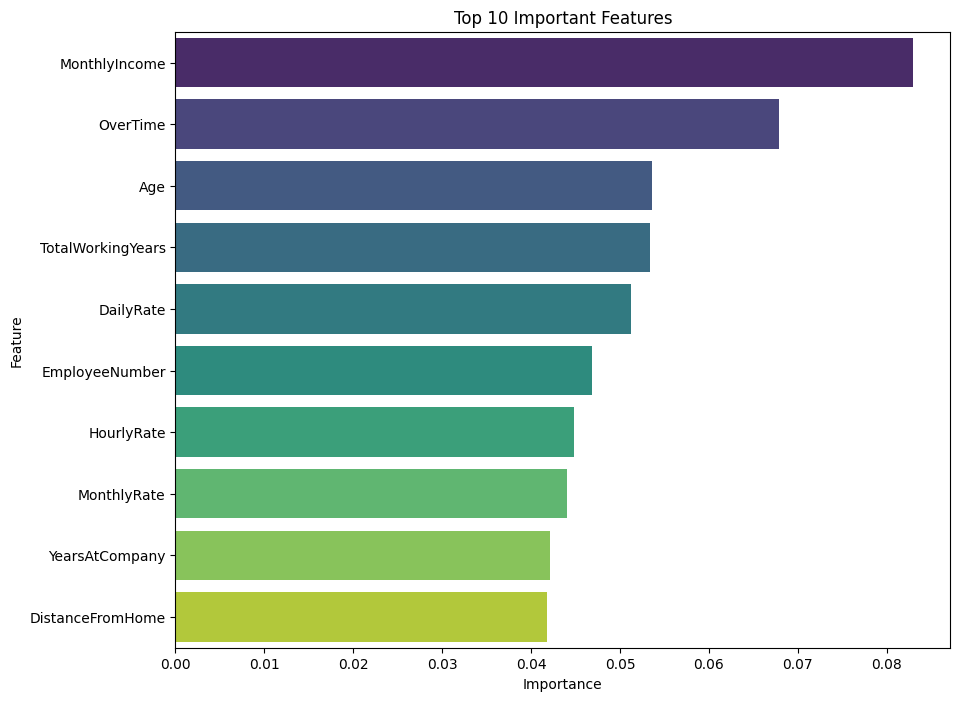

In [159]:
plt.figure(figsize=(10, 8))
sns.barplot(data=top_features, y='Feature', x='Importance', palette='viridis')
45
plt.title('Top 10 Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()